In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt
from datetime import datetime
from __future__ import division
from sklearn.preprocessing import Imputer
%matplotlib inline

In [3]:
master = pd.read_csv("data/master.csv", index_col="RegionName")

In [4]:
master.head()

,City,State,Metro,CountyName,Date,MedianSoldPrice,HomesSoldAsForeclosures-Ratio,MedianListingPrice,MedianListingPricePerSqft,MedianPctOfPriceReduction,...,PctOfHomesSellingForGain,PctOfHomesSellingForLoss,PctOfListingsWithPriceReductions,PctTransactionsThatArePreviouslyForeclosuredHomes,PriceToRentRatio,SalePriceToListRatio,Turnover,UnsoldReos,Zri,ZriPerSqft
RegionName,,,,,,,,,,,,,,,,,,,,,
90250,Hawthorne,CA,Los Angeles,Los Angeles,2010-11,418253.50,12.0404,349000,244.616639,5.459509,...,82.9563,17.0437,12.2402,28.0262,14.23,0.9858,4.5185,186.4,2162,1.616
37211,Nashville,TN,Nashville,Davidson,2010-11,151565.00,6.1549,145000,97.007979,4.784689,...,89.0536,10.9464,19.5611,22.9346,11.02,0.9669,4.7542,104.7,1013,0.694
37013,Nashville,TN,Nashville,Davidson,2010-11,133185.00,18.2936,137900,80.489164,5.811623,...,80.2179,19.7821,14.8459,34.8475,9.98,0.9667,5.4725,285.8,1051,0.640
90046,Los Angeles,CA,Los Angeles,Los Angeles,2010-11,789357.35,7.6675,759000,474.186992,7.604563,...,82.6362,17.3638,23.6273,8.6604,21.03,0.9712,4.7911,175.0,3127,2.046
28269,Charlotte,NC,Charlotte,Mecklenburg,2010-11,169600.00,15.5052,149900,81.117353,7.076483,...,77.2419,22.7581,12.3716,21.4731,10.99,0.9660,5.0793,171.6,1043,0.592


#### Subset only relevant columns

In [5]:
subset_states = ["CA", "AZ", "WA", "VA", "OH", "NC", "CO", "PA", "NV", "TN", "MN", "OR", "MA", "CT", "SC", "NJ", "OK"]
homes_selling_for_loss = master[master["State"].isin(subset_states)]
homes_selling_for_loss = homes_selling_for_loss[["Date", "PctOfHomesSellingForLoss"]]
hsfl_df = homes_selling_for_loss.reset_index().pivot(index="RegionName"
                                                     , columns="Date"
                                                     , values="PctOfHomesSellingForLoss")
hsfl_df.head()

Date,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,...,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02
RegionName,,,,,,,,,,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.8307,32.8272,33.5962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.0040,31.075,28.5417,NaN,NaN,NaN,NaN,NaN
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring Data

There are a significant amount of NaNs in the dataset. This may be a source of noise in the final clusters.

In [6]:
for year in range(2010, 2016):
    start = "%s-01" % year
    end = "%s-01" % (year+1)
    mask = (homes_selling_for_loss["Date"] >= start) & (homes_selling_for_loss["Date"] < end)
    by_year = homes_selling_for_loss[mask].reset_index().pivot(index="RegionName", columns="Date", values="PctOfHomesSellingForLoss")
    print year
    print "No Total Zip Codes:", len(by_year)
    print "Number of Zips with Values for all dates:", len(by_year.dropna())
    print "Pct of Zips with available data:", round(len(by_year.dropna())/len(by_year),2) 
    print 

2010
No Total Zip Codes: 1454
Number of Zips with Values for all dates: 947
Pct of Zips with available data: 0.65

2011
No Total Zip Codes: 2242
Number of Zips with Values for all dates: 692
Pct of Zips with available data: 0.31

2012
No Total Zip Codes: 2481
Number of Zips with Values for all dates: 670
Pct of Zips with available data: 0.27

2013
No Total Zip Codes: 2534
Number of Zips with Values for all dates: 644
Pct of Zips with available data: 0.25

2014
No Total Zip Codes: 2599
Number of Zips with Values for all dates: 770
Pct of Zips with available data: 0.3

2015
No Total Zip Codes: 1572
Number of Zips with Values for all dates: 957
Pct of Zips with available data: 0.61



## Impute Missing Values

Since there are a lot of missing values, missing data will be filled with the corresponding zipcode's average for the given year.

In [7]:
# axis = 1 is for along the rows
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
data = imp.fit_transform(np.array(hsfl_df))
print len(data)

2970


In [8]:
data

array([[ 40.66166667,  40.66166667,  40.66166667, ...,  40.66166667,
         40.66166667,  40.66166667],
       [ 36.70663333,  36.70663333,  36.70663333, ...,  36.70663333,
         36.70663333,  36.70663333],
       [ 46.04203333,  46.04203333,  46.04203333, ...,  46.04203333,
         46.04203333,  46.04203333],
       ..., 
       [ 22.295025  ,  22.295025  ,  22.295025  , ...,  14.2696    ,
         24.9375    ,  25.1714    ],
       [ 23.23887778,  23.23887778,  23.23887778, ...,  23.23887778,
         23.23887778,  23.23887778],
       [ 12.3029    ,  10.2616    ,   7.3302    , ...,  14.4589    ,
          8.1735    ,   8.9512    ]])

## Apply Time Series Clustering

In [11]:
def DTWDistance(s1, s2, w):
    DTW={}
    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1, len(s1)):
        for j in range(-1, len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist = (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])


def LB_Keogh(s1, s2, r):
    LB_sum = 0
    for ind, i in enumerate(s1):
        
        lower_bound = min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound = max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i > upper_bound:
            LB_sum = LB_sum+(i-upper_bound)**2
        elif i < lower_bound:
            LB_sum = LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

import random

def k_means_clust(data, num_clust, num_iter, w=1):
    #assign random data points as starting centroids
    centroids = random.sample(data, num_clust)
    counter = 0
    
    for n in range(num_iter):
        counter += 1
        assignments = {}
        
        #assign data points to clusters
        for ind, i in enumerate(data):
            min_dist = float('inf')
            closest_clust = None
            
            for c_ind, j in enumerate(centroids):
                
                if LB_Keogh(i, j, 5) < min_dist:
                    cur_dist = DTWDistance(i,j,w)
                    
                    if cur_dist < min_dist:
                        min_dist = cur_dist
                        closest_clust = c_ind
                        
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust] = []
        
        #recalculate centroids of clusters
        cluster_sum = 0
        for key in assignments:
            clust_sum = 0
            
            for k in assignments[key]:
                clust_sum=clust_sum + data[k]
                
            centroids[key] = [m/len(assignments[key]) for m in clust_sum]
            cluster_sum += sum(clust_sum)
        
            
    return (assignments, centroids)

In [12]:
number_of_clusters = 4
number_of_iterations = 1
lookup_distance = 1

assignments, centroids, min_dist = k_means_clust(data, number_of_clusters, number_of_iterations, lookup_distance)
for i in centroids:
    plt.plot(i)

plt.show()

ValueError: need more than 2 values to unpack

In [27]:
print sorted(min_dist)[len(min_dist)-1] - sorted(min_dist)[0]

325.520288889


In [28]:
clusters = np.zeros(len(data))
for key, value in assignments.items():
    clusters[value] = key

In [29]:
hsfl_df["cluster"] = clusters
cluster_assignments = hsfl_df[["cluster"]]
cluster_assignments.head()

Date,cluster
RegionName,
1001,0
1002,0
1013,1
1020,1
1028,1


## Join Clusters back to Master

In [30]:
master_clustered = master.join(cluster_assignments)

In [31]:
filename = "../results/master_clustered_no_clstrs_%s_no_iters_%s_lkup_dist_%s.csv" % (number_of_clusters, number_of_iterations, lookup_distance)
master_clustered.to_csv(filename, date_format='%Y%m%d')

## Subset States

In [9]:
ca_homes_selling_for_loss = master[master["State"] == "CA"]
ca_hsfl_df = ca_homes_selling_for_loss.reset_index().pivot(index="RegionName"
                                                     , columns="Date"
                                                     , values="PctOfHomesSellingForLoss")
ca_hsfl_df.head()

Date,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,...,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02
RegionName,,,,,,,,,,,,,,,,,,,,,
90002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.7474,9.8086,10.6431,NaN,NaN,NaN,NaN,NaN,NaN
90003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90004,NaN,NaN,NaN,NaN,NaN,NaN,20,25.3274,NaN,23.0769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.3543,NaN,NaN,NaN,NaN,NaN,NaN
90008,NaN,NaN,NaN,NaN,17.6471,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# axis = 1 is for along the rows
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
ca_data = imp.fit_transform(np.array(ca_hsfl_df))
print len(ca_data)

800


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


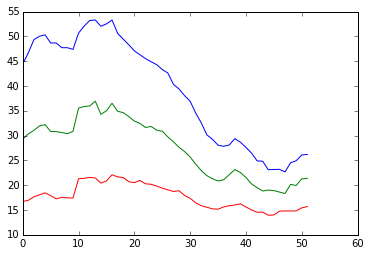

In [12]:
number_of_clusters = 3
number_of_iterations = 20
lookup_distance = 3

assignments, centroids, min_dist=k_means_clust(ca_data, number_of_clusters, number_of_iterations, lookup_distance)
for i in centroids:
    plt.plot(i)

plt.show()